In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

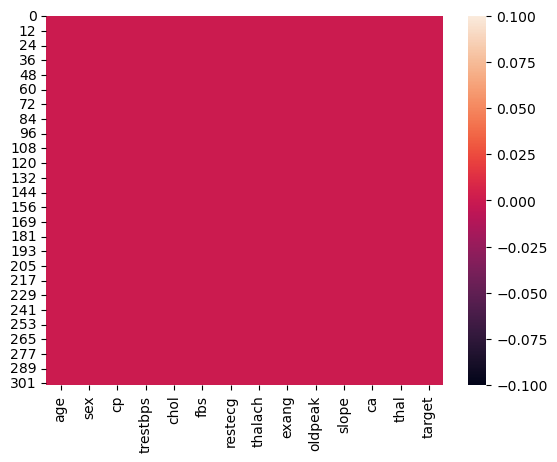

In [13]:
sb.heatmap(df.isnull())
plt.show()

In [14]:
X = df.drop('target',axis=1)
Y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.3, random_state=1)

In [17]:
# Applying scaling on 70% of the data
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
# Train the model with 70% of data
lr.fit(X_train,Y_train)

LogisticRegression()

In [23]:
# Testing the model
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
dict = {'Actual Output':Y_test, 'Predicted Output': y_pred}
df1 = pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
174,0,0
88,1,1
163,1,1
243,0,0
110,1,1
...,...,...
215,0,0
75,1,1
201,0,0
224,0,0


In [25]:
# check for the score
lr.score(X_test,Y_test)

0.7924528301886793

In [26]:
# creating a classification Report
from sklearn.metrics import classification_report

In [27]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       103
           1       0.76      0.87      0.81       109

    accuracy                           0.79       212
   macro avg       0.80      0.79      0.79       212
weighted avg       0.80      0.79      0.79       212



In [28]:
from sklearn.metrics import confusion_matrix

In [30]:
print(confusion_matrix(Y_test, y_pred))

[[73 30]
 [14 95]]


In [31]:
TP,FP,FN,TN = confusion_matrix(Y_test,y_pred).flatten()
print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 73
True Negative: 95
False Positive: 30
False Negative: 14


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
for i in range(1,101):
    dtc =DecisionTreeClassifier(random_state=i)
    
    # Train the model with 70% of data
    dtc.fit(X_train,Y_train)
    
    # Test the model with 30% of data
    y_pred = dtc.predict(X_test)
    print('Random State', i)
    
    # generate classification report
    
    print(classification_report(Y_test,y_pred))
    
    # generate confusion matrix
    
    print(confusion_matrix(Y_test,y_pred))

Random State 1
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       103
           1       0.76      0.83      0.79       109

    accuracy                           0.77       212
   macro avg       0.78      0.77      0.77       212
weighted avg       0.78      0.77      0.77       212

[[74 29]
 [19 90]]
Random State 2
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       103
           1       0.74      0.82      0.78       109

    accuracy                           0.76       212
   macro avg       0.76      0.76      0.76       212
weighted avg       0.76      0.76      0.76       212

[[72 31]
 [20 89]]
Random State 3
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       103
           1       0.74      0.83      0.78       109

    accuracy                           0.76       212
   macro avg       0.76      0.76      0.76  